<a href="https://colab.research.google.com/github/saptarshimajumdar/ML-Lab/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install graphviz


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

iris = fetch_ucirepo(id=53)

X = iris.data.features
y = iris.data.targets


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

print("==== GaussianNB ====")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
evaluate_model(y_test, gnb.predict(X_test))

print("\n==== MultinomialNB ====")
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
evaluate_model(y_test, mnb.predict(X_test))

print("\n==== BernoulliNB ====")
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
evaluate_model(y_test, bnb.predict(X_test))


==== GaussianNB ====
Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1 Score: 0.9777448559670782
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45


==== MultinomialNB ====
Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1 Score: 0.9555555555555556
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.92      0.92      0.92 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Best max_depth: 3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



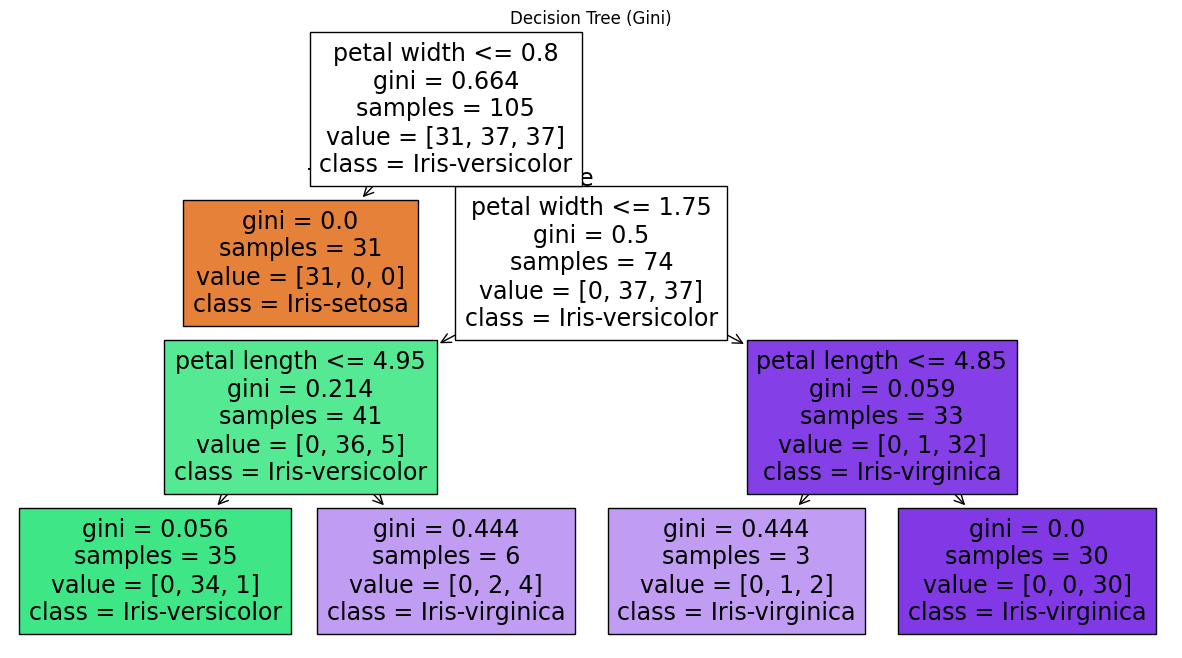

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [2, 3, 4, 5]}
grid = GridSearchCV(DecisionTreeClassifier(criterion='gini'), params, cv=5)
grid.fit(X_train, y_train)

best_tree = grid.best_estimator_
print("Best max_depth:", grid.best_params_['max_depth'])

evaluate_model(y_test, best_tree.predict(X_test))

plt.figure(figsize=(15, 8))
plot_tree(best_tree, feature_names=X.columns, class_names=best_tree.classes_, filled=True)
plt.title("Decision Tree (Gini)")
plt.show()


Breast Cancer

In [ ]:
from ucimlrepo import fetch_ucirepo

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

print("==== GaussianNB ====")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
evaluate_model(y_test, gnb.predict(X_test))

print("\n==== MultinomialNB ====")
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
evaluate_model(y_test, mnb.predict(X_test))

print("\n==== BernoulliNB ====")
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
evaluate_model(y_test, bnb.predict(X_test))

==== GaussianNB ====
Accuracy: 0.9415204678362573
Precision: 0.941391481684838
Recall: 0.9415204678362573
F1 Score: 0.9413171134406007
Confusion Matrix:
 [[104   4]
 [  6  57]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.96      0.95       108
           M       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171


==== MultinomialNB ====
Accuracy: 0.9122807017543859
Precision: 0.9168339400537542
Recall: 0.9122807017543859
F1 Score: 0.9102107884152059
Confusion Matrix:
 [[106   2]
 [ 13  50]]
Classification Report:
               precision    recall  f1-score   support

           B       0.89      0.98      0.93       108
           M       0.96      0.79      0.87        63

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Best max_depth: 5
Accuracy: 0.9532163742690059
Precision: 0.9532163742690059
Recall: 0.9532163742690059
F1 Score: 0.9532163742690059
Confusion Matrix:
 [[104   4]
 [  4  59]]
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.96      0.96       108
           M       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



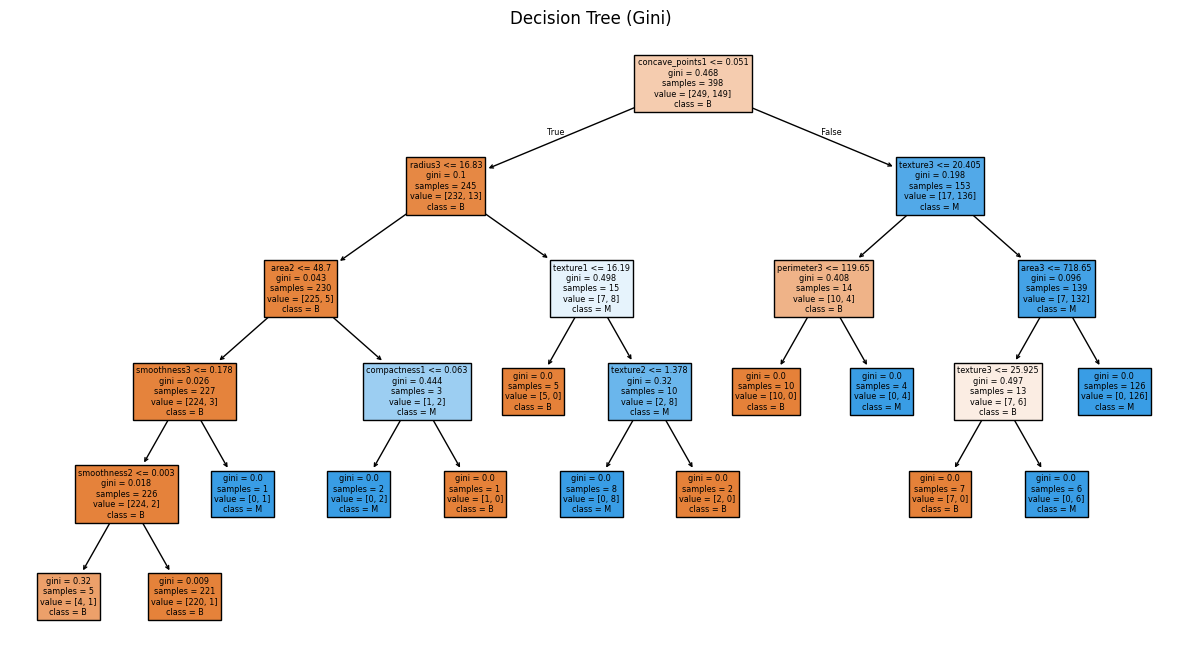

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Grid Search to tune tree
params = {'max_depth': [2, 3, 4, 5]}
grid = GridSearchCV(DecisionTreeClassifier(criterion='gini'), params, cv=5)
grid.fit(X_train, y_train)

best_tree = grid.best_estimator_
print("Best max_depth:", grid.best_params_['max_depth'])

# Evaluate
evaluate_model(y_test, best_tree.predict(X_test))

# Visualize
plt.figure(figsize=(15, 8))
plot_tree(best_tree, feature_names=X.columns, class_names=best_tree.classes_, filled=True)
plt.title("Decision Tree (Gini)")
plt.show()